In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy import stats
# from sklearn.metrics import mean_squared_error
# from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np 
#import statsmodels.api as sm
import plotly.express as px

In [5]:
def dframe(df): #read csv file
    df=pd.read_csv(df)
    return df 

In [6]:
df=dframe(df='weatherAUS.csv')
print(display(df.head(3)),display(df.tail(3)))#eerste 3 column en laatste 3 column


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[3 rows x 23 columns]

None None


In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
f'totaal isnull:{df.isnull().sum().sum()}'

'totaal isnull:343248'

In [9]:
miss=df.isnull().sum().sort_values(ascending=False).head(10)
miss_per=(miss/len(df))*100
pd.DataFrame({'No missing values':miss, '% of missing data':miss_per.values})

No missing values  % of missing data
Sunshine                   69835          48.009762
Evaporation                62790          43.166506
Cloud3pm                   59358          40.807095
Cloud9am                   55888          38.421559
Pressure9am                15065          10.356799
Pressure3pm                15028          10.331363
WindDir9am                 10566           7.263853
WindGustDir                10326           7.098859
WindGustSpeed              10263           7.055548
Humidity3pm                 4507           3.098446

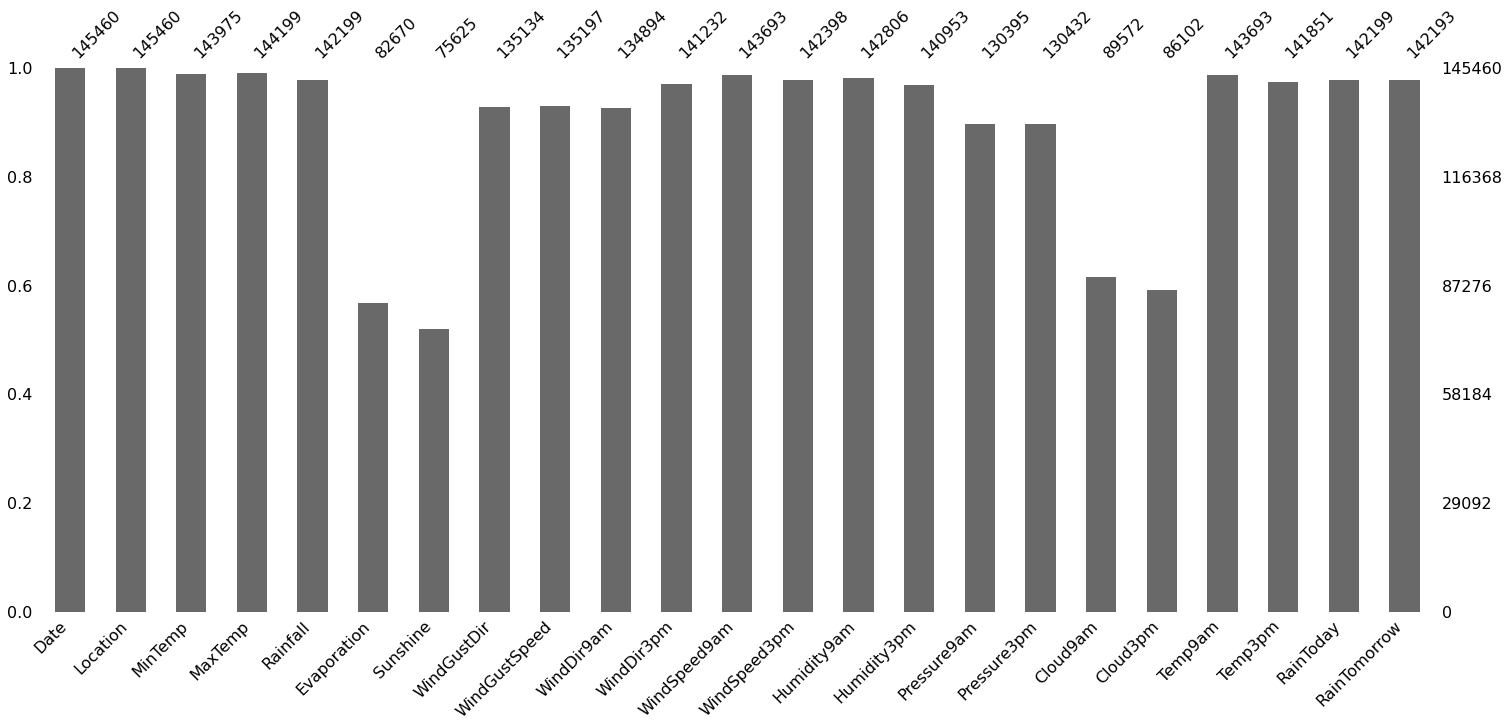

In [10]:
msno.bar(df);

<AxesSubplot:>

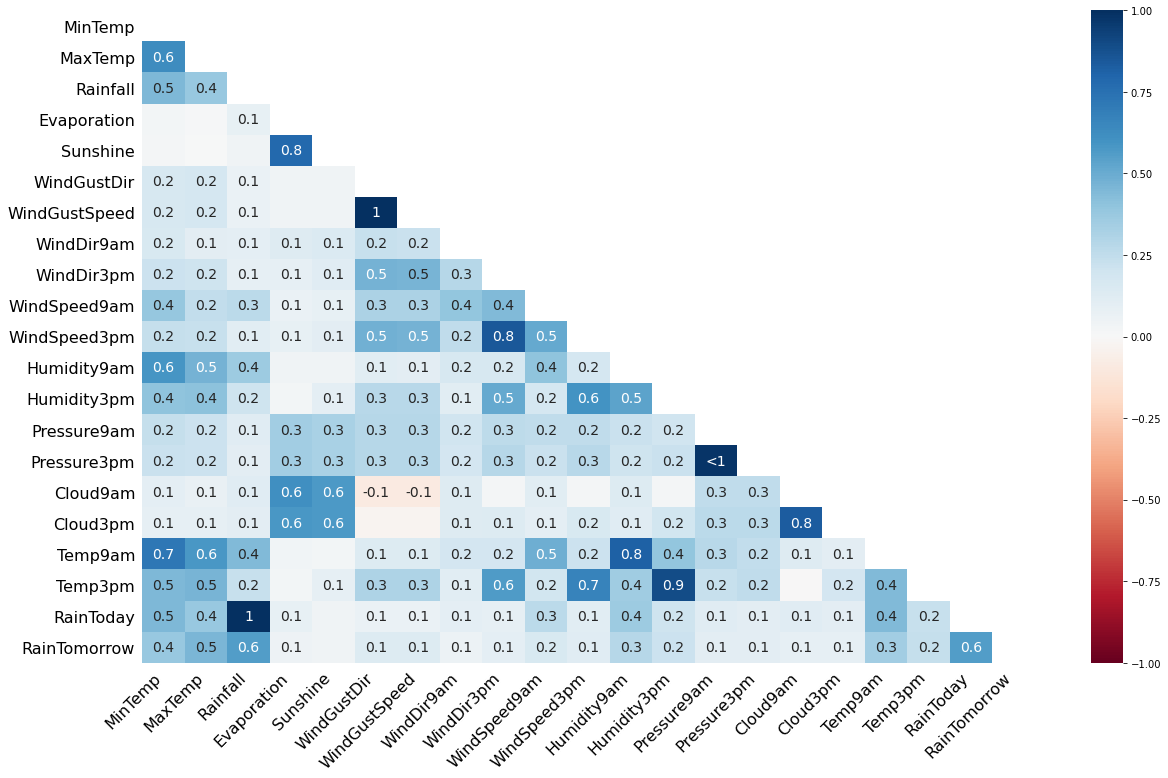

In [11]:
msno.heatmap(df)

In [12]:
df.dropna(subset=['RainToday','RainTomorrow'])

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [13]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [14]:
df.select_dtypes(include='object').columns #categorical variables

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
X=pd.get_dummies(data=df, columns=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'],drop_first=True)
X=X.drop(['Date','Location','Evaporation','Sunshine'],axis=1)
index=X.index
columns=X.columns
X

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   
145459     14.9      NaN       0.0            NaN          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
0              71.0         22.0       1007.7       1007.1  ...             0   
1              44.0         25.0       1010.6       1007.8  ...             0   
2              38.0         30.0       1007.6       1008.7  ...             0   
3              45.0         16.0       1017.6       1012.8  ...             0   
4              82.0         33.0       1010.8       1006.0  ...             0   
...             ...          ...          ...          ...  ...           ...   
145455         51.0         24.0       1024.6       1020.3  ...             0   
145456         56.0         21.0       1023.5       1019.1  ...             0   
145457         53.0         24.0       1021.0       1016.8  ...             0   
145458         51.0         24.0       1019.4       1016.5  ...             0   
145459         62.0         36.0       1020.2       1017.9  ...             0   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0                   0               0               0              0   
1                   0               0               0              0   
2                   0               0               0              0   
3                   0               0               0              0   
4                   0               0               0              0   
...               ...             ...             ...            ...   
145455              0               0               0              0   
145456              0               0               0              0   
145457              0               0               0              0   
145458              0               0               0              0   
145459              0               0               0              0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_Yes  \
0                  0               1               0              0   
1                  0               0               1              0   
2                  0               0               1              0   
3                  0               0               0              0   
4                  0               0               0              0   
...              ...             ...             ...            ...   
145455             0               0               0              0   
145456             0               0               0              0   
145457             0               1               0              0   
145458             0               0               0              0   
145459             0               0               0              0   

        RainTomorrow_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
145455                 0  
145456                 0  
145457                 0  
145458                 0  
145459                 0  

[145460 rows x 61 c

In [16]:
ip_mean=IterativeImputer(random_state=0)
ip_mean.fit(X)
X_imputed=ip_mean.transform(X)
ip_bayesian=pd.DataFrame(X_imputed, index=X.index,columns=X.columns)
ip_bayesian.isnull().sum()

C:\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


MinTemp             0
MaxTemp             0
Rainfall            0
WindGustSpeed       0
WindSpeed9am        0
                   ..
WindDir3pm_W        0
WindDir3pm_WNW      0
WindDir3pm_WSW      0
RainToday_Yes       0
RainTomorrow_Yes    0
Length: 61, dtype: int64

In [18]:
numerical=[]
for i in df.columns:
    j=df[i].dtypes
    if j!='object':
        numerical.append(j)

In [19]:
X

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145455      2.8     23.4       0.0           31.0          13.0          11.0   
145456      3.6     25.3       0.0           22.0          13.0           9.0   
145457      5.4     26.9       0.0           37.0           9.0           9.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   
145459     14.9      NaN       0.0            NaN          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
0              71.0         22.0       1007.7       1007.1  ...             0   
1              44.0         25.0       1010.6       1007.8  ...             0   
2              38.0         30.0       1007.6       1008.7  ...             0   
3              45.0         16.0       1017.6       1012.8  ...             0   
4              82.0         33.0       1010.8       1006.0  ...             0   
...             ...          ...          ...          ...  ...           ...   
145455         51.0         24.0       1024.6       1020.3  ...             0   
145456         56.0         21.0       1023.5       1019.1  ...             0   
145457         53.0         24.0       1021.0       1016.8  ...             0   
145458         51.0         24.0       1019.4       1016.5  ...             0   
145459         62.0         36.0       1020.2       1017.9  ...             0   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0                   0               0               0              0   
1                   0               0               0              0   
2                   0               0               0              0   
3                   0               0               0              0   
4                   0               0               0              0   
...               ...             ...             ...            ...   
145455              0               0               0              0   
145456              0               0               0              0   
145457              0               0               0              0   
145458              0               0               0              0   
145459              0               0               0              0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_Yes  \
0                  0               1               0              0   
1                  0               0               1              0   
2                  0               0               1              0   
3                  0               0               0              0   
4                  0               0               0              0   
...              ...             ...             ...            ...   
145455             0               0               0              0   
145456             0               0               0              0   
145457             0               1               0              0   
145458             0               0               0              0   
145459             0               0               0              0   

        RainTomorrow_Yes  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
145455                 0  
145456                 0  
145457                 0  
145458                 0  
145459                 0  

[145460 rows x 61 c

In [20]:
df_copy=X.copy()
df_copy.dropna(inplace=True)
df_copy

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4          17.5     32.3       1.0           41.0           7.0          20.0   
11         15.9     21.7       2.2           31.0          15.0          13.0   
12         15.9     18.6      15.6           61.0          28.0          28.0   
16         14.1     20.9       0.0           22.0          11.0           9.0   
17         13.5     22.9      16.8           63.0           6.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145428     14.6     26.3       0.0           37.0          19.0          20.0   
145429     14.3     27.6       0.4           39.0           0.0          20.0   
145432     12.7     22.2       0.0           37.0          19.0          13.0   
145433      9.4     22.7       0.0           35.0          13.0          17.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  ...  WindDir3pm_S  \
4              82.0         33.0       1010.8       1006.0  ...             0   
11             89.0         91.0       1010.5       1004.2  ...             0   
12             76.0         93.0        994.3        993.0  ...             0   
16             69.0         82.0       1012.2       1010.4  ...             0   
17             80.0         65.0       1005.8       1002.2  ...             0   
...             ...          ...          ...          ...  ...           ...   
145428         61.0         36.0       1022.0       1018.6  ...             1   
145429         68.0         27.0       1020.5       1016.1  ...             0   
145432         59.0         34.0       1024.3       1021.7  ...             0   
145433         62.0         32.0       1026.6       1023.6  ...             0   
145458         51.0         24.0       1019.4       1016.5  ...             0   

        WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
4                   0               0               0              0   
11                  0               0               0              0   
12                  0               0               0              0   
16                  0               0               0              0   
17                  0               0               0              0   
...               ...             ...             ...            ...   
145428              0               0               0              0   
145429              0               0               0              0   
145432              0               0               0              0   
145433              0               0               0              0   
145458              0               0               0              0   

        WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_Yes  \
4                  0               0               0              0   
11                 0               0               0              1   
12                 0               0               0              1   
16                 0               0               0              0   
17                 0               1               0              1   
...              ...             ...             ...            ...   
145428             0               0               0              0   
145429             0               0               0              0   
145432             0               0               0              0   
145433             0               0               0              0   
145458             0               0               0              0   

        RainTomorrow_Yes  
4                      0  
11                     1  
12                     1  
16                     1  
17                     1  
...                  ...  
145428                 0  
145429                 0  
145432                 0  
145433                 0  
145458                 0  

[73890 rows x 61 co

In [21]:
df_copy.select_dtypes(include=numerical)

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4          17.5     32.3       1.0           41.0           7.0          20.0   
11         15.9     21.7       2.2           31.0          15.0          13.0   
12         15.9     18.6      15.6           61.0          28.0          28.0   
16         14.1     20.9       0.0           22.0          11.0           9.0   
17         13.5     22.9      16.8           63.0           6.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145428     14.6     26.3       0.0           37.0          19.0          20.0   
145429     14.3     27.6       0.4           39.0           0.0          20.0   
145432     12.7     22.2       0.0           37.0          19.0          13.0   
145433      9.4     22.7       0.0           35.0          13.0          17.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
4              82.0         33.0       1010.8       1006.0       7.0   
11             89.0         91.0       1010.5       1004.2       8.0   
12             76.0         93.0        994.3        993.0       8.0   
16             69.0         82.0       1012.2       1010.4       8.0   
17             80.0         65.0       1005.8       1002.2       8.0   
...             ...          ...          ...          ...       ...   
145428         61.0         36.0       1022.0       1018.6       7.0   
145429         68.0         27.0       1020.5       1016.1       4.0   
145432         59.0         34.0       1024.3       1021.7       8.0   
145433         62.0         32.0       1026.6       1023.6       8.0   
145458         51.0         24.0       1019.4       1016.5       3.0   

        Cloud3pm  Temp9am  Temp3pm  
4            8.0     17.8     29.7  
11           8.0     15.9     17.0  
12           8.0     17.4     15.8  
16           1.0     17.2     18.1  
17           1.0     18.0     21.5  
...          ...      ...      ...  
145428       1.0     15.4     25.0  
145429       7.0     16.1     27.2  
145432       8.0     13.9     21.0  
145433       4.0     11.8     22.3  
145458       2.0     15.1     26.0  

[73890 rows x 14 columns]

In [22]:
df_copy. isnull().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
WindGustSpeed       0
WindSpeed9am        0
                   ..
WindDir3pm_W        0
WindDir3pm_WNW      0
WindDir3pm_WSW      0
RainToday_Yes       0
RainTomorrow_Yes    0
Length: 61, dtype: int64

In [23]:
df_copy.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
WindGustSpeed       float64
WindSpeed9am        float64
                     ...   
WindDir3pm_W          uint8
WindDir3pm_WNW        uint8
WindDir3pm_WSW        uint8
RainToday_Yes         uint8
RainTomorrow_Yes      uint8
Length: 61, dtype: object

In [24]:
df_nummer=df_copy.select_dtypes(include=numerical)
z=np.abs(stats.zscore(df_nummer))
threshold=3
print('list of otliers:', '\n',np.where(z>3)[0],'\n', np.where(z>3)[1])
print('number of outliers:', np.where(z>3)[0].shape)

list of otliers: 
 [    2     2     6 ... 73857 73858 73882] 
 [8 9 3 ... 9 2 2]
number of outliers: (3861,)


In [25]:
Q1_maxtemp=df_copy.MaxTemp.quantile(0.25)
Q3_maxtemp=df_copy.MaxTemp.quantile(0.75)
IQR_maxtemp=Q3_maxtemp-Q1_maxtemp
upper_maxtemp=Q3_maxtemp+1.5*IQR_maxtemp
lower_maxtemp=Q1_maxtemp-1.5*IQR_maxtemp
print(f"""Q1_maxtemp={Q1_maxtemp}
          Q3_maxtemp={Q3_maxtemp}
          IQR_maxtemp={IQR_maxtemp}
          upper_maxtemp={upper_maxtemp}
          lower_maxtemp={lower_maxtemp}""")


Q1_maxtemp=18.1
          Q3_maxtemp=29.2
          IQR_maxtemp=11.099999999999998
          upper_maxtemp=45.849999999999994
          lower_maxtemp=1.4500000000000028


In [26]:
fig=px.box(df_copy, y=['MaxTemp'],title='Max Temp')
fig.show()

In [43]:
Q1=df_copy.quantile(0.25)
Q3=df_copy.quantile(0.75)
IQR=Q3-Q1
IQR

MinTemp              9.9
MaxTemp             11.1
Rainfall             1.0
WindGustSpeed       17.0
WindSpeed9am        11.0
                    ... 
WindDir3pm_W         0.0
WindDir3pm_WNW       0.0
WindDir3pm_WSW       0.0
RainToday_Yes        0.0
RainTomorrow_Yes     0.0
Length: 61, dtype: float64

In [27]:
#Multivariate (isolation Forest)
from sklearn.ensemble import IsolationForest

In [28]:
y_iso=df_copy.select_dtypes(include=numerical)['MaxTemp']
X_iso=df_copy.select_dtypes(include=numerical).drop(['MaxTemp'], axis=1)

In [31]:
clf=IsolationForest(n_estimators=100, max_samples='auto',contamination=0.10,random_state=42)
clf.fit(X_iso)
y_pred=clf.predict(X_iso)
outliers_values=X_iso[clf.predict(X_iso)==-1]
outliers_values.shape

(7389, 13)

In [32]:
df_copy.dropna(inplace=True)
df_num= df_copy.select_dtypes(include=numerical)
df_num.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [33]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

In [34]:
df_num

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
4          17.5     32.3       1.0           41.0           7.0          20.0   
11         15.9     21.7       2.2           31.0          15.0          13.0   
12         15.9     18.6      15.6           61.0          28.0          28.0   
16         14.1     20.9       0.0           22.0          11.0           9.0   
17         13.5     22.9      16.8           63.0           6.0          20.0   
...         ...      ...       ...            ...           ...           ...   
145428     14.6     26.3       0.0           37.0          19.0          20.0   
145429     14.3     27.6       0.4           39.0           0.0          20.0   
145432     12.7     22.2       0.0           37.0          19.0          13.0   
145433      9.4     22.7       0.0           35.0          13.0          17.0   
145458      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
4              82.0         33.0       1010.8       1006.0       7.0   
11             89.0         91.0       1010.5       1004.2       8.0   
12             76.0         93.0        994.3        993.0       8.0   
16             69.0         82.0       1012.2       1010.4       8.0   
17             80.0         65.0       1005.8       1002.2       8.0   
...             ...          ...          ...          ...       ...   
145428         61.0         36.0       1022.0       1018.6       7.0   
145429         68.0         27.0       1020.5       1016.1       4.0   
145432         59.0         34.0       1024.3       1021.7       8.0   
145433         62.0         32.0       1026.6       1023.6       8.0   
145458         51.0         24.0       1019.4       1016.5       3.0   

        Cloud3pm  Temp9am  Temp3pm  
4            8.0     17.8     29.7  
11           8.0     15.9     17.0  
12           8.0     17.4     15.8  
16           1.0     17.2     18.1  
17           1.0     18.0     21.5  
...          ...      ...      ...  
145428       1.0     15.4     25.0  
145429       7.0     16.1     27.2  
145432       8.0     13.9     21.0  
145433       4.0     11.8     22.3  
145458       2.0     15.1     26.0  

[73890 rows x 14 columns]

In [38]:
scaler=MinMaxScaler()
columns=df_num.columns
df_copyScale=scaler.fit_transform(df_num)
df_copyScale=pd.DataFrame(df_num, columns=columns)
df_copyScale.reset_index(drop=True,inplace=True)
df_copyScale

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0         17.5     32.3       1.0           41.0           7.0          20.0   
1         15.9     21.7       2.2           31.0          15.0          13.0   
2         15.9     18.6      15.6           61.0          28.0          28.0   
3         14.1     20.9       0.0           22.0          11.0           9.0   
4         13.5     22.9      16.8           63.0           6.0          20.0   
...        ...      ...       ...            ...           ...           ...   
73885     14.6     26.3       0.0           37.0          19.0          20.0   
73886     14.3     27.6       0.4           39.0           0.0          20.0   
73887     12.7     22.2       0.0           37.0          19.0          13.0   
73888      9.4     22.7       0.0           35.0          13.0          17.0   
73889      7.8     27.0       0.0           28.0          13.0           7.0   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0             82.0         33.0       1010.8       1006.0       7.0       8.0   
1             89.0         91.0       1010.5       1004.2       8.0       8.0   
2             76.0         93.0        994.3        993.0       8.0       8.0   
3             69.0         82.0       1012.2       1010.4       8.0       1.0   
4             80.0         65.0       1005.8       1002.2       8.0       1.0   
...            ...          ...          ...          ...       ...       ...   
73885         61.0         36.0       1022.0       1018.6       7.0       1.0   
73886         68.0         27.0       1020.5       1016.1       4.0       7.0   
73887         59.0         34.0       1024.3       1021.7       8.0       8.0   
73888         62.0         32.0       1026.6       1023.6       8.0       4.0   
73889         51.0         24.0       1019.4       1016.5       3.0       2.0   

       Temp9am  Temp3pm  
0         17.8     29.7  
1         15.9     17.0  
2         17.4     15.8  
3         17.2     18.1  
4         18.0     21.5  
...        ...      ...  
73885     15.4     25.0  
73886     16.1     27.2  
73887     13.9     21.0  
73888     11.8     22.3  
73889     15.1     26.0  

[73890 rows x 14 columns]

In [39]:
y=df_copyScale['MaxTemp']
X=df_copyScale.drop(['MaxTemp'],axis=1)
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred=clf.fit_predict(X)
X_scores=clf.negative_outlier_factor_
np.sort(X_scores)[:100]

array([-3.0779366 , -1.96710423, -1.84752203, -1.82297105, -1.78524115,
       -1.73918025, -1.71276185, -1.70784406, -1.70229447, -1.69640588,
       -1.68195143, -1.6799589 , -1.65999069, -1.65844286, -1.65633711,
       -1.65199185, -1.6501701 , -1.64918842, -1.64496819, -1.64450619,
       -1.6363209 , -1.6342495 , -1.63424587, -1.61415909, -1.60943728,
       -1.60842995, -1.60421104, -1.60382963, -1.60140841, -1.59650367,
       -1.59183422, -1.58838482, -1.58588386, -1.58584596, -1.58331553,
       -1.58143357, -1.57786329, -1.57742133, -1.5659721 , -1.5652597 ,
       -1.56364362, -1.56318152, -1.56301455, -1.5611247 , -1.56088587,
       -1.55970902, -1.55796249, -1.55542044, -1.55352926, -1.55340283,
       -1.55178268, -1.55072681, -1.55071931, -1.547673  , -1.5454656 ,
       -1.54126501, -1.5392522 , -1.53793783, -1.53761916, -1.53689825,
       -1.53559822, -1.53493131, -1.53162102, -1.52934222, -1.52914622,
       -1.52881208, -1.52859832, -1.52734991, -1.52565025, -1.52

In [40]:
threshold=np.sort(X_scores)[1357]
threshold

-1.2643639230981625

In [41]:
X[(X_scores>threshold)==False].shape

(1358, 13)

In [45]:
df_numeric=df_num[~((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any(axis=1)]
print(df_numeric.shape)
print(df_num.shape)

(57253, 14)
(73890, 14)


C:\Users\Hallo\AppData\Local\Temp/ipykernel_12248/50812502.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

C:\Users\Hallo\AppData\Local\Temp/ipykernel_12248/50812502.py:1: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [46]:
df_numeric1=df_num.copy()
Q1_Maxtemp=df.MaxTemp.quantile(0.25)
Q3_Maxtemp=df.MaxTemp.quantile(0.75)
IQR_MaxTemp=Q3_Maxtemp-Q1_Maxtemp
df_numeric1.MaxTemp[((df_numeric1.MaxTemp<(Q1_Maxtemp-1.5*IQR_MaxTemp))|(df_numeric1.MaxTemp>(Q3_Maxtemp+1.5*IQR_MaxTemp)))]=df_numeric1.MaxTemp.mean()

In [47]:
fig=px.box(y=df_numeric1.MaxTemp)
fig.show()